In [2]:
import pandas as pd
from geopy.distance import geodesic
import matplotlib.pyplot as plt

# Step 1: Read the CSV file into a DataFrame
file_path = r"/content/chicago_taxi_trips_2016_02.csv"
df = pd.read_csv(file_path)
df.head(8)

,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,fare,tips,tolls,extras,trip_total,payment_type,company,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude
0,53.0,2016-2-28 04:30:00,2016-2-28 04:45:00,840.0,0.30,NaN,NaN,7.0,31.0,15.00,0.0,0.0,0.0,15.00,Cash,8.0,173.0,203.0,558.0,388.0
1,8147.0,2016-2-10 11:30:00,2016-2-10 11:45:00,480.0,1.01,NaN,504.0,28.0,32.0,7.00,1.0,0.0,0.0,8.00,Credit Card,NaN,395.0,408.0,744.0,605.0
2,6234.0,2016-2-18 15:15:00,2016-2-18 15:15:00,180.0,0.40,NaN,16.0,32.0,32.0,4.50,0.0,0.0,0.0,4.50,Cash,NaN,18.0,610.0,18.0,610.0
3,6434.0,2016-2-17 22:00:00,2016-2-17 22:00:00,420.0,2.30,NaN,NaN,NaN,NaN,8.75,0.0,0.0,0.0,8.75,Cash,NaN,NaN,NaN,NaN,NaN
4,64.0,2016-2-22 13:45:00,2016-2-22 14:00:00,1200.0,17.10,NaN,313.0,28.0,76.0,42.00,0.0,0.0,2.0,44.00,Cash,107.0,411.0,545.0,225.0,6.0
5,6081.0,2016-2-20 10:30:00,2016-2-20 10:45:00,900.0,0.10,NaN,1046.0,32.0,33.0,10.75,0.0,0.0,1.0,11.75,Cash,8.0,18.0,610.0,728.0,277.0
6,8629.0,2016-2-28 02:30:00,2016-2-28 02:45:00,480.0,2.00,NaN,1077.0,8.0,7.0,8.50,2.0,0.0,1.0,11.50,Credit Card,101.0,695.0,366.0,724.0,47.0
7,7215.0,2016-2-4 12:30:00,2016-2-4 13:00:00,960.0,3.90,NaN,NaN,NaN,NaN,13.75,2.0,0.0,0.0,15.75,Credit Card,92.0,NaN,NaN,NaN,NaN


In [3]:
# dealing with missing values without using dropna
# Fill missing values in the columns `pickup_latitude` and `pickup_longitude`
# with the mean values of the respective columns.
df['pickup_latitude'].fillna(df['pickup_latitude'].mean(), inplace=True)
df['pickup_longitude'].fillna(df['pickup_longitude'].mean(), inplace=True)


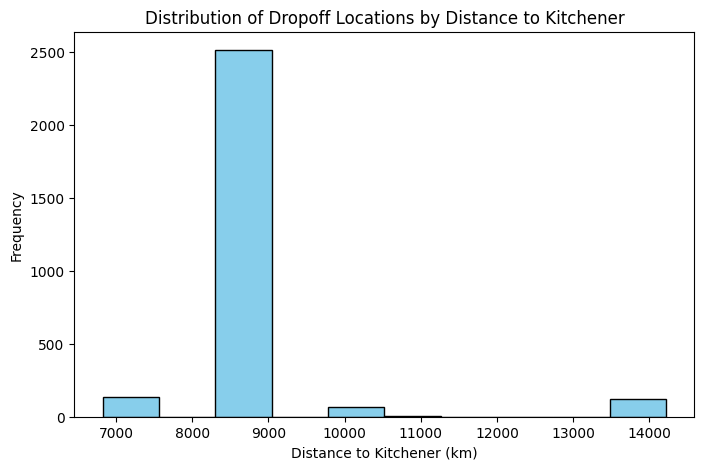

In [4]:
# Step 2: Clean the data
# Remove rows with missing or invalid latitude and longitude values
df = df.dropna(subset=['dropoff_latitude', 'dropoff_longitude'])
df = df[(df['dropoff_latitude'] >= -90) & (df['dropoff_latitude'] <= 90)]
df = df[(df['dropoff_longitude'] >= -180) & (df['dropoff_longitude'] <= 180)]

# Step 3: Calculate distances between dropoff locations and Kitchener
kitchener_coords = (43.45, -80.50)  # Kitchener coordinates
df['distance_to_kitchener'] = df.apply(lambda row: geodesic((row['dropoff_latitude'], row['dropoff_longitude']), kitchener_coords).km, axis=1)

# Step 5: Plot a histogram of distances to Kitchener
plt.figure(figsize=(8, 5))
plt.hist(df['distance_to_kitchener'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Distance to Kitchener (km)')
plt.ylabel('Frequency')
plt.title('Distribution of Dropoff Locations by Distance to Kitchener')
plt.show()

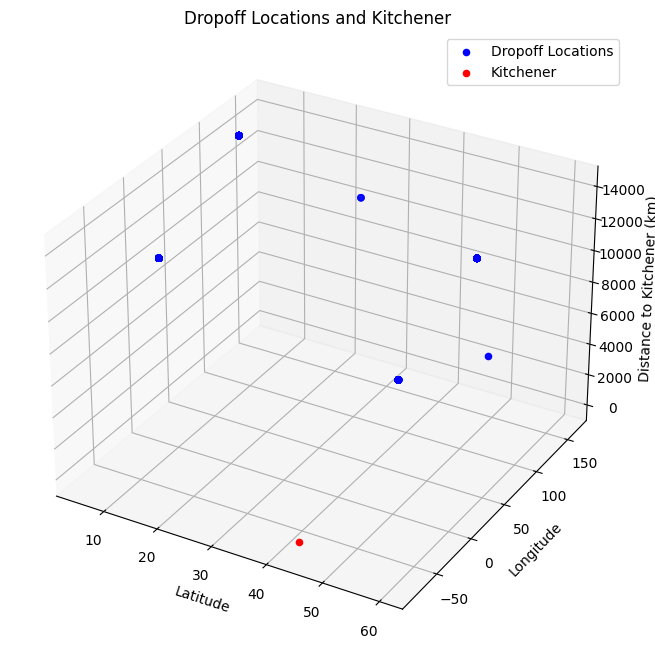

In [5]:
from mpl_toolkits.mplot3d import Axes3D
# Calculate distances between dropoff locations and Kitchener
kitchener_coords = (43.45, -80.50)  # Kitchener coordinates
df['distance_to_kitchener'] = df.apply(lambda row: geodesic((row['dropoff_latitude'], row['dropoff_longitude']), kitchener_coords).km, axis=1)

# Plot the dropoff locations in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot dropoff locations with respect to latitude, longitude, and distance to Kitchener
ax.scatter(df['dropoff_latitude'], df['dropoff_longitude'], df['distance_to_kitchener'], c='blue', label='Dropoff Locations')
ax.scatter(kitchener_coords[0], kitchener_coords[1], 0, c='red', label='Kitchener')

ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')
ax.set_zlabel('Distance to Kitchener (km)')
ax.set_title('Dropoff Locations and Kitchener')

plt.legend()
plt.show()

In [6]:
df.isna().sum()

taxi_id                      0
trip_start_timestamp         0
trip_end_timestamp           0
trip_seconds                 1
trip_miles                   0
pickup_census_tract       2835
dropoff_census_tract         0
pickup_community_area        7
dropoff_community_area       0
fare                         0
tips                         0
tolls                        0
extras                       0
trip_total                   0
payment_type                 0
company                    898
pickup_latitude              0
pickup_longitude             0
dropoff_latitude             0
dropoff_longitude            0
distance_to_kitchener        0
dtype: int64

In [7]:
df['fare'].fillna(df['fare'].mean(), inplace=True)
df['trip_total'].fillna(df['trip_total'].mean(), inplace=True)
df['trip_miles'].fillna(df['trip_miles'].mean(), inplace=True)
df['dropoff_latitude'].fillna(df['dropoff_latitude'].mean(), inplace=True)
df['dropoff_longitude'].fillna(df['dropoff_longitude'].mean(), inplace=True)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


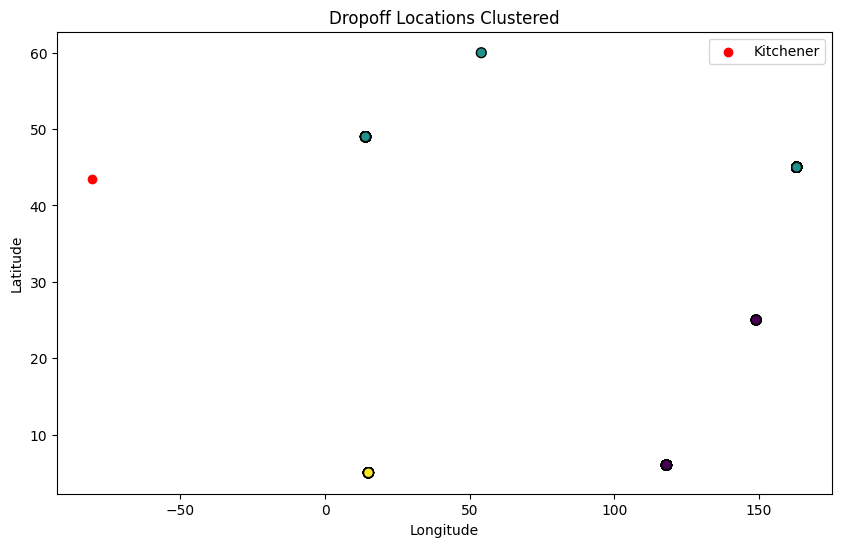

In [8]:
from geopy.distance import geodesic
from sklearn.cluster import KMeans
# # Calculate distances between dropoff locations and Kitchener
# kitchener_coords = (43.45, -80.50)  # Kitchener coordinates
# df['distance_to_kitchener'] = df.apply(lambda row: geodesic((row['dropoff_latitude'], row['dropoff_longitude']), kitchener_coords).km, axis=1)

# Perform K-means clustering
X = df[['trip_total', 'fare', 'trip_miles', 'pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude']]
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X)

# Visualize clusters on a map
plt.figure(figsize=(10, 6))
plt.scatter(df['dropoff_longitude'], df['dropoff_latitude'], c=df['cluster'], cmap='viridis', edgecolor='k', s=50)
plt.scatter(kitchener_coords[1], kitchener_coords[0], c='red', label='Kitchener')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Dropoff Locations Clustered')
plt.legend()
plt.show()

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
import folium

df = df.dropna(subset=['pickup_latitude', 'pickup_longitude'])
df = df[(df['pickup_latitude'] >= -90) & (df['pickup_latitude'] <= 90)]
df = df[(df['pickup_longitude'] >= -180) & (df['pickup_longitude'] <= 180)]

# Split data into features (X) and target (y)
X = df[['trip_total', 'fare', 'trip_miles', 'pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude']]
y = df['cluster']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a machine learning model (e.g., Random Forest Classifier)
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict labels for the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print("Model Evaluation Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)


Model Evaluation Metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0


In [10]:
import folium

# Create a map
m = folium.Map(location=[43.45, -80.50], zoom_start=10)

# Add clustered dropoff locations to the map
colors = ['blue', 'green', 'red']  # Define colors for clusters
for index, row in df.iterrows():
    folium.CircleMarker(
        location=(row['dropoff_latitude'], row['dropoff_longitude']),
        radius=5,
        color=colors[int(row['cluster'])],
        fill=True,
        fill_color=colors[int(row['cluster'])]
    ).add_to(m)

# Add markers for Kitchener, Waterloo, Cambridge, and other hotspots
locations = {
    'Kitchener': [43.45, -80.50],
    'Waterloo': [43.47, -80.53],
    'Cambridge': [43.36, -80.31],
    'Toronto': [43.42, -80.45],
    'Guleph': [43.52, -80.26],
    # Add more hotspots as needed
}

for name, location in locations.items():
    folium.Marker(location=location, popup=name, icon=folium.Icon(color='red')).add_to(m)

# Display the map
m
